## 1 Gathering Data

In [2]:
import pandas as pd
import requests 
# !pip install tweepy
import tweepy

### 1.1 Twitter Archive Enhanced file

In [80]:
# read WeRateDogs Twitter archive
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### 1.2 Image Predictions File 
#### 1.2.1 Data Dictionary
**img_num:** corresponding to the most confident prediction, each tweets can have up to 4 images 

**tweet_id:** last part of the tweet URL after "status/" https://twitter.com/dog_rates/status/889531135344209921

**p1:** the no. 1 prediction 

**p1_conf:** the confidence of the prediction of p1

**p1_dog:** whether or not the #1 prediction is a breed of dog 

In [81]:
# download the file for tweet image predictions
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# from contextlib import closing
# with closing(requests.get(url, stream=True)) as r:
# string = r.text
img_df = pd.read_csv(url, sep='\t')
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3 Extract data from the Twitter API

In [82]:
# Twitter API credentials 
# consumer_key = 
# consumer_secret = 
# access_token = 
# access_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [83]:
# to create text file of json objects 

import json
import time

# store each tweet's entire set of JSON data 
with open('tweet_json.txt', 'a+', encoding='utf8') as file:
    for tweetID in archive_df['tweet_id']:
        try:
            # timer 
            start = time.time()
            print("hello")
            
            status = api.get_status(tweetID, tweet_mode='extended',
                                    wait_on_rate_limit=True,
                                    wait_on_rate_limit_notify=True)
            # file.write(json.dumps(status)) # use json.dumps dump string, doesn't work here so I use json.dump
            json.dump(status._json, file) # use json.dump
            file.write('\n') # one line for one object for easy manipulation later
            end = time.time()
            print(end - start)
            print(tweetID)
        except:
            pass
    


In [84]:
# read json line by line to a list 
import json
status = []
with open('tweet_json.txt') as file:
    for line in file:
        status.append(json.loads(line))

In [85]:
# read the text to a dataframe
json_df = pd.read_json('tweet_json.txt', lines=True)

### 1.4 Unused code snippets

In [86]:
# # to extract only like and retweet count for each tweet

# # set empty lists
# retweet_count=[]
# like_count=[]

# # api call for retweet and like count 
# for tweet in archive_df['tweet_id']:
#     try:
#         t = api.get_status(tweet, tweet_mode='extended')
#         retweet_count.append(t.retweet_count)
#         like_count.append(t.favorite_count)
#     except:
#         retweet_count.append(None)
#         like_count.append(None)
        
        
# # attach the lists back to the dog df
# archive_df['retweet_count']=retweet_count
# archive_df['like_count']=like_count
# archive_df.tail()

In [87]:
# # to read all the nested json objects into columns
# from pandas.io.json import json_normalize  

# # read the json list to a dataframe
# json_df = json_normalize(status)

# # show all columns in df.head()
# pd.set_option('display.max_columns', None)
# json_df.head()

# # view columns
# cols = json_df.columns.tolist()
# cols

### 1.5 Summary of data gathering
Three dataframes are constructed, they are:
1. archive_df (WeRateDogs Twitter Archive)
2. img_df (Image Prediction tsv)
3. json_df (json objects from Twitter API)

## 2 Assessing Data

### 2.1 For WeRateDogs Twitter Archive

In [88]:
# check the total no of rows and columns 
archive_df.shape

(2356, 17)

In [89]:
# check for row duplicates
sum(archive_df.duplicated())

0

In [90]:
# checks if any of columns have null values 
archive_df.isnull().sum().any()

True

In [91]:
# view missing value count for each feature
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [92]:
# inspect datatypes, any null values, missing data or erroneous data
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Observation:** 
- Rows are incomplete with values, i.e. there are missing or null values. 
- Id needs to be changed from float into int
- Some columns have datatypes as 'objects', need further investigation on the underlying data types


In [93]:
# show column name, column datatype, and the underlying datatype of the data
for col in archive_df.columns:
    print(col, '|', archive_df[col].dtypes, '|', type(archive_df[col][0]),'\n')


tweet_id | int64 | <class 'numpy.int64'> 

in_reply_to_status_id | float64 | <class 'numpy.float64'> 

in_reply_to_user_id | float64 | <class 'numpy.float64'> 

timestamp | object | <class 'str'> 

source | object | <class 'str'> 

text | object | <class 'str'> 

retweeted_status_id | float64 | <class 'numpy.float64'> 

retweeted_status_user_id | float64 | <class 'numpy.float64'> 

retweeted_status_timestamp | object | <class 'float'> 

expanded_urls | object | <class 'str'> 

rating_numerator | int64 | <class 'numpy.int64'> 

rating_denominator | int64 | <class 'numpy.int64'> 

name | object | <class 'str'> 

doggo | object | <class 'str'> 

floofer | object | <class 'str'> 

pupper | object | <class 'str'> 

puppo | object | <class 'str'> 



In [94]:
# check the dog stage attributes
archive_df.query('floofer=="floofer"').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,None


In [95]:
# check dog names
archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

**Observations:**
1. Dog stages can be represented by 1 and 0 instead of the name of the dog stage.
2. Some dogs are in more than one stage
3. Some dogs have weird or no names e.g. old, officially, mad, such, a

### Rating abnormalties


In [96]:
print((archive_df.rating_numerator/archive_df.rating_denominator).describe())
print(archive_df.rating_numerator.describe())
print(archive_df.rating_denominator.describe())

count    2356.0
mean        inf
std         NaN
min         0.0
25%         1.0
50%         1.1
75%         1.2
max         inf
dtype: float64
count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64
count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64


In [97]:
# display the denominators larger than 10
archive_df.query('rating_denominator>10').rating_denominator

342      15
433      70
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
Name: rating_denominator, dtype: int64

In [98]:
# no of denominators larger than 10 
print(archive_df.query('rating_denominator>10').tweet_id.count())
print(archive_df.query('rating_denominator>10').rating_denominator)

20
342      15
433      70
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
Name: rating_denominator, dtype: int64


**Observations:**
1. The maximum numerators and denominator are way too large. But the rating system seems to be arbitrary anyways.
2. The denominator should be 10, but there are 20 with bizzare denominators.

### 2.2 Next Steps for archive_df

**To-do:**
1. change all ids that are in float to int
2. change timestamp from string to datetime
3. change retweeted_status_timestamp from string to datetime
4. change all dog types from string to booleans (doggo	floofer	pupper	puppo)
5. I'll leave dog names as they are for now.
6. Change denominator to be 10 


**To-do from Project Motivation:**
1. Remove tweets without image
2. Remove retweets 
3. Merge dataframes
4. Remove tweets beyond August 1st, 2017


## 3 Cleaning data

### 3.1 ID - float to int


In [99]:
# # show when tweet_id is null 
# archive_df[archive_df['tweet_id']!=archive_df['tweet_id']]['tweet_id']

In [100]:
id_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id'] 

for i in id_list:
    # archive_df[i].astype(int)
    print(archive_df[i].isna().sum())

2278
2278
2175
2175


Turns out there is NA values in IDs. We can keep the float as it doesnt hurt the analysis process later.

### 3.2 Change string to timestamps


In [101]:
archive_df.retweeted_status_timestamp = pd.to_datetime(archive_df.retweeted_status_timestamp)
archive_df.timestamp = pd.to_datetime(archive_df.timestamp)

### 3.3 Change dog stages to 0 and 1


In [102]:
stage_list = ['doggo', 'floofer', 'pupper', 'puppo']

# print existing unique values under the 4 dog stages
for dog in stage_list:
    print(dog, archive_df[dog].unique(),'\n')


doggo ['None' 'doggo'] 

floofer ['None' 'floofer'] 

pupper ['None' 'pupper'] 

puppo ['None' 'puppo'] 



In [103]:
# map 0 1 
for dog in stage_list:
    # create dictionary for mapping
    d = {'None': 0, dog: 1}
    archive_df[dog] = archive_df[dog].map(d)

In [104]:
# print updated unique values under the 4 dog stages
for dog in stage_list:
    print(dog, archive_df[dog].unique(),'\n')

doggo [0 1] 

floofer [0 1] 

pupper [0 1] 

puppo [0 1] 



### 3.4 Remove tweets with no image 
First, merge the image prediction with the twitter archive dataframe by tweet_id. Then remove those tweets without image. merge() has how default as 'inner' so no need to remove tweets without image explicitly.

In [105]:
# no of image range from 1 to 4 in img_df
img_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [106]:
archive_df = archive_df.merge(img_df, on='tweet_id')
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null datetime64[ns, UTC]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null datetime64[ns, UTC]
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null int64
floofer                       2075 non-null int64
pupper                        2075 non-null int64
puppo                         2075 non-null int64
jpg_url      

### 3.5 Remove retweets 
As there are many retweets that dont contribute to our analysis, let's remove them here. First step is to take   retweet count data by merging the json_df with archive_df:

In [107]:
# merging with json_df for retweeted, retweet counts and favourite counts
archive_df=archive_df.merge(json_df[['id', 'retweeted_status', 'retweet_count','favorite_count']], left_on='tweet_id', right_on='id', how='left')

In [108]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id', 'retweeted_status',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [109]:
# # # drop excessive columns at the end
# archive_df=archive_df.drop(archive_df.columns[-1:],axis=1)
# archive_df.columns

In [110]:
# show the no of tweets that are retweets
archive_df.query('retweeted_status==retweeted_status').tweet_id.count()

72

In [111]:
# keep tweets that are not retweets
archive_df = archive_df[archive_df.retweeted_status != archive_df.retweeted_status]

In [112]:
# show the no of tweets that are retweets
archive_df.query('retweeted_status==retweeted_status').tweet_id.count()

0

In [114]:
# after merging, tweet_id become float
# change to int
# archive_df['tweet_id'].astype(int, inplace=True)
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 0 to 2074
Data columns (total 32 columns):
tweet_id                      2003 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2003 non-null datetime64[ns, UTC]
source                        2003 non-null object
text                          2003 non-null object
retweeted_status_id           9 non-null float64
retweeted_status_user_id      9 non-null float64
retweeted_status_timestamp    9 non-null datetime64[ns, UTC]
expanded_urls                 2003 non-null object
rating_numerator              2003 non-null int64
rating_denominator            2003 non-null int64
name                          2003 non-null object
doggo                         2003 non-null int64
floofer                       2003 non-null int64
pupper                        2003 non-null int64
puppo                         2003 non-null int64
jpg_url         

### 3.6 Remove tweets beyond August 1st, 2017

In [115]:
archive_df[archive_df.timestamp > '2017-08-01']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweeted_status,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8.924206e+17,NaN,7670.0,36033.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,8.921774e+17,NaN,5671.0,31079.0


No need to remove as tweets are on or before 2017-08-01.

### 3.7 Remove unneccesary columns 

In [116]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweeted_status,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8.924206e+17,NaN,7670.0,36033.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,8.921774e+17,NaN,5671.0,31079.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,8.918152e+17,NaN,3759.0,23390.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8.916896e+17,NaN,7836.0,39294.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8.913276e+17,NaN,8443.0,37515.0


In [117]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id', 'retweeted_status',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [118]:
# check the no of values in in_reply_to_user_id
archive_df.in_reply_to_user_id.value_counts()

4.196984e+09    23
Name: in_reply_to_user_id, dtype: int64

In [139]:
# list of columns to be removed
remove = ['source', 'expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','id']
archive_df.drop(remove, axis=1, inplace=True)
archive_df.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

### 3.8 Summary of data cleaning 

1. Whether or not it is float or int does not detriment the data analysis process, therefore IDs are kept as float instead of changing to integer: `'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id'`
2. Dates are changed from string to timestamps: `retweeted_status_timestamp` and `timestamp`
3. Dog stages are changed from string to 0s and 1s: `'doggo', 'floofer', 'pupper', 'puppo'`
4. Tweets with no image are removed by inner merging `archive_df` with `img_df`.
5. Retweets are removed by dropping rows with a `retweeted_status` object
6. Tweets beyond August 1st, 2017 does not exist
7. Remove columns that are repetitive, of little use, or no use anymore, including: 
   - 'in_reply_to_status_id'
   - 'in_reply_to_user_id'
   - 'retweeted_status'
   - 'retweeted_status_id'
   - 'retweeted_status_user_id'
   - 'retweeted_status_timestamp'
   - 'id'

## 4 Storing Data

In [140]:
# store the dataframe into twitter_archive_master.csv
archive_df.to_csv('twitter_archive_master.csv', index=False)

In [141]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id              2003 non-null int64
timestamp             2003 non-null datetime64[ns, UTC]
text                  2003 non-null object
rating_numerator      2003 non-null int64
rating_denominator    2003 non-null int64
name                  2003 non-null object
doggo                 2003 non-null int64
floofer               2003 non-null int64
pupper                2003 non-null int64
puppo                 2003 non-null int64
jpg_url               2003 non-null object
img_num               2003 non-null int64
p1                    2003 non-null object
p1_conf               2003 non-null float64
p1_dog                2003 non-null bool
p2                    2003 non-null object
p2_conf               2003 non-null float64
p2_dog                2003 non-null bool
p3                    2003 non-null object
p3_conf               2003 non-null float64
p3_dog                2003 no

## 5 Analysing and Visualising Data
At least three (3) insights and one (1) visualization must be produced.

In [142]:
# import the cleaned data to a new df
df = pd.read_csv('twitter_archive_master.csv')

### 5.1 How are the ratings of dogs?

In [143]:
# construct a rating column
df['rating']=df.rating_numerator/df.rating_denominator

Text(0.5, 1.0, 'Dog rating ratio')

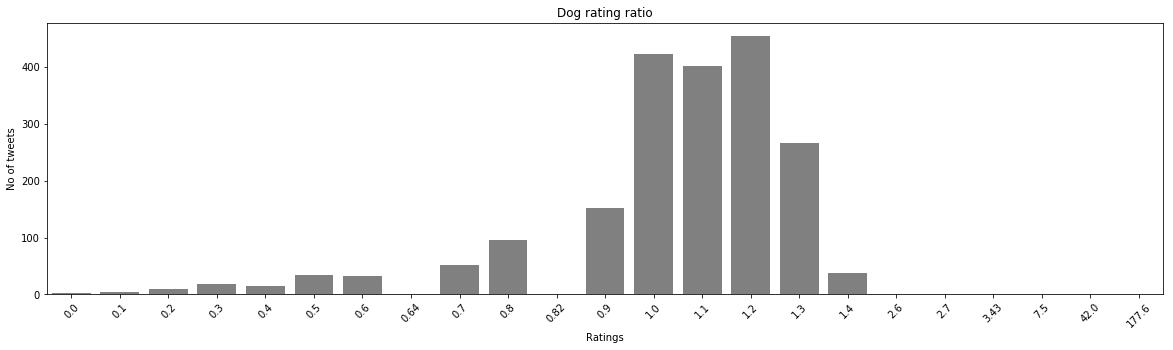

In [144]:
import seaborn as sb
import matplotlib.pyplot as plt

# rating_count=archive_df.rating.value_counts()
plt.figure(figsize=(20,5))
sb.countplot(round(df.rating,2), color='grey')
plt.xticks(rotation=45)
plt.xlabel('Ratings')
plt.ylabel('No of tweets')
plt.title('Dog rating ratio')

**Observations:**
1. The most common ratings are 1.2, 1.0, 1.1 and 1,3
2. There are more than 200 dogs in each of these most common ratings.
3. The lowest rating is 0 ... :<
4. The highest rating is 177.6 XD

### 5.2 How many dogs in each dog stage?

In [171]:
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']
for dog in dog_stage:
    print('Number of', dog, '=', df[dog].sum())

Number of doggo = 75
Number of floofer = 8
Number of pupper = 213
Number of puppo = 23


### 5.3 What are the top dog names?

In [181]:
n=pd.DataFrame(df.name.value_counts())
# show names with more than 5 dog having that name
n[n.name>5]

,name
None,551
a,55
Charlie,11
Lucy,10
Oliver,10
Cooper,10
Tucker,9
Penny,9
Winston,8
Sadie,8


**Observations:**
1. 551 dog names are not retrieved
2. The most common name is Charlie!

### 5.4 What are the breeds?

In [187]:
df.query('p1_dog==True').p1.value_counts()

golden_retriever                  139
Labrador_retriever                 96
Pembroke                           89
Chihuahua                          81
pug                                54
chow                               41
Samoyed                            40
Pomeranian                         38
toy_poodle                         38
malamute                           29
cocker_spaniel                     27
French_bulldog                     26
Chesapeake_Bay_retriever           23
miniature_pinscher                 22
German_shepherd                    20
Siberian_husky                     20
Staffordshire_bullterrier          20
Shetland_sheepdog                  18
Maltese_dog                        18
Eskimo_dog                         18
Shih-Tzu                           17
Cardigan                           17
beagle                             17
Rottweiler                         17
Italian_greyhound                  16
kuvasz                             16
Lakeland_ter

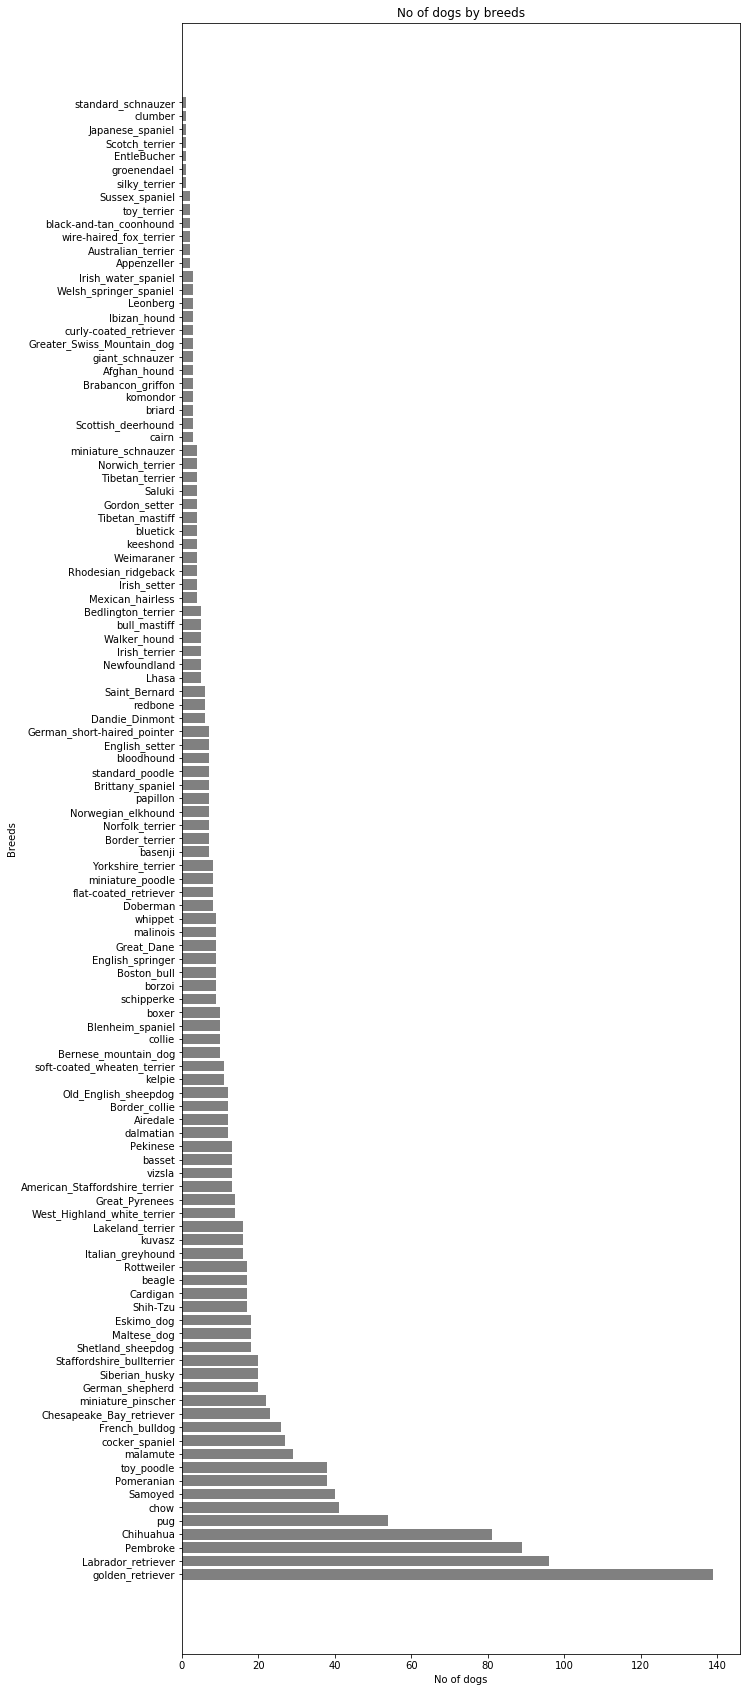

In [197]:
# display the number of dogs by their breed prediction
breed = df.query('p1_dog==True').p1.value_counts()
plt.figure(figsize=(10,30))
plt.barh(breed.index, width=breed.values, color='grey')
plt.xlabel('No of dogs')
plt.ylabel('Breeds')
plt.title('No of dogs by breeds');
# sb.countplot(df.query('p1_dog==True').p1)

## 5.5 Which is the most popular dog?

In [205]:
df.loc[df['retweet_count'].idxmax()]

tweet_id                                             744234799360020481
timestamp                                     2016-06-18 18:26:18+00:00
text                  Here's a doggo realizing you can stand in a po...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
doggo                                                                 1
floofer                                                               0
pupper                                                                0
puppo                                                                 0
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                               1
p1                                                   Labrador_retriever
p1_conf                                                        0

In [206]:
df.loc[df['favorite_count'].idxmax()]

tweet_id                                             744234799360020481
timestamp                                     2016-06-18 18:26:18+00:00
text                  Here's a doggo realizing you can stand in a po...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
doggo                                                                 1
floofer                                                               0
pupper                                                                0
puppo                                                                 0
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                               1
p1                                                   Labrador_retriever
p1_conf                                                        0

In [215]:
popName = df.loc[df['favorite_count'].idxmax()]['p1']
popRetweet = df.retweet_count.max()
popFav = df.favorite_count.max()

In [216]:
print('The most retweeted dog is the same as the most favourited dog! It is a {}. The tweet has {} retweets and {} likes.'
      .format(popName, popRetweet, popFav))

The most retweeted dog is the same as the most favourited dog! It is a Labrador_retriever. The tweet has 77415.0 retweets and 155406.0 likes.
